In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\Arman\\Desktop\\TCO_Academy\\homeworks\\homework_33'

Import all neccessary libraries and read New York City dataset. It has Customer info, such as Email, Address, and their color Avatar. Then it also has numerical value columns:

Avg. Session Length: Average session of in-store style advice sessions.
Time on App: Average time spent on App in minutes
Time on Website: Average time spent on Website in minutes
Length of Membership: How many years the customer has been a member.

In [13]:
ecommerse = pd.read_csv('Ecommerce_Customers')
ecommerse.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


Here we see that actually users spent more time on website

Check the head of customers, and check out its info() and describe() methods.



In [15]:
ecommerse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [16]:
ecommerse.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?



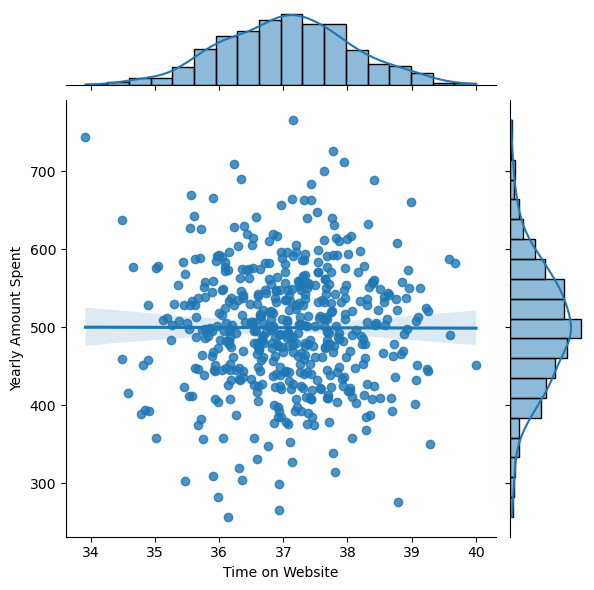

In [60]:
sns.jointplot(data=ecommerse, x="Time on Website", y="Yearly Amount Spent", kind='reg')

In [62]:
x = ecommerse["Time on Website"]
y = ecommerse["Yearly Amount Spent"]
coef = np.corrcoef(x,y)
print(coef)

[[ 1.         -0.00264084]
 [-0.00264084  1.        ]]


Here we see that this to columns are weekly correlated with each other and their correlation coefficent are very smal

Do the same but with the Time on App column instead.

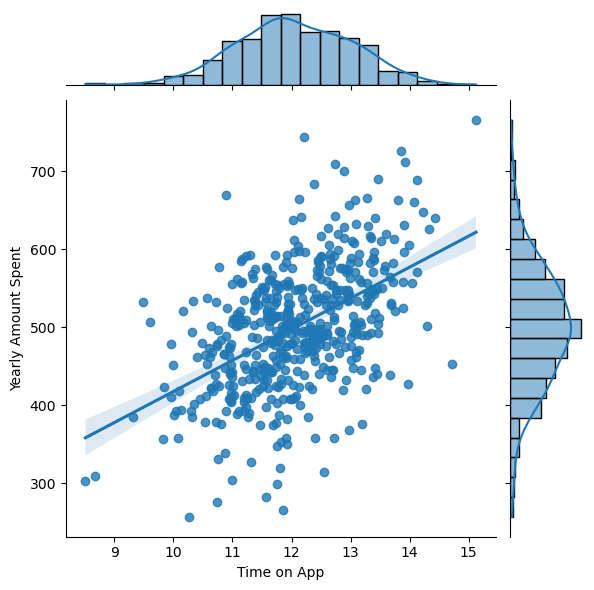

In [63]:
sns.jointplot(data=ecommerse, x="Time on App", y="Yearly Amount Spent", kind='reg')


In [64]:
x2 = ecommerse["Time on App"]
y2 = ecommerse["Yearly Amount Spent"]
coef2 = np.corrcoef(x2,y2)
print(coef2)

[[1.         0.49932777]
 [0.49932777 1.        ]]


 In this plot of 'Time on App' and 'Yearly Amount Spent', the y values tend to increase as the x values increase. This illustrates strong positive correlation

Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.

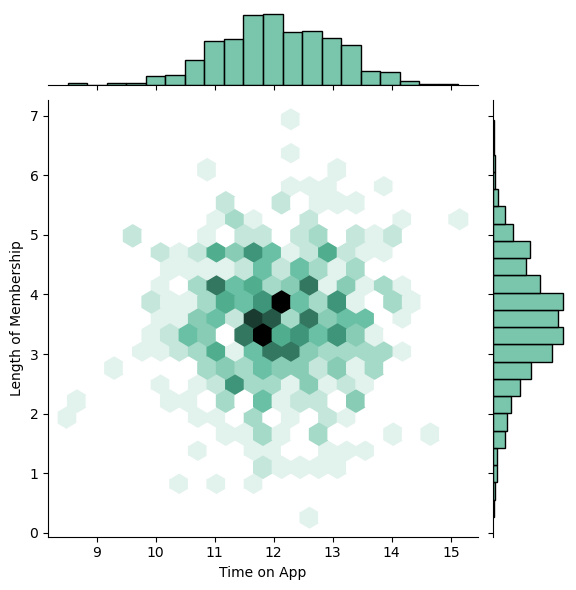

In [66]:
sns.jointplot(data=ecommerse,x='Time on App', y='Length of Membership', kind="hex", color="#4CB391",)

Let's explore these types of relationships across the entire data set. Use pairplot to recreate the plot below.(Don't worry about the the colors).

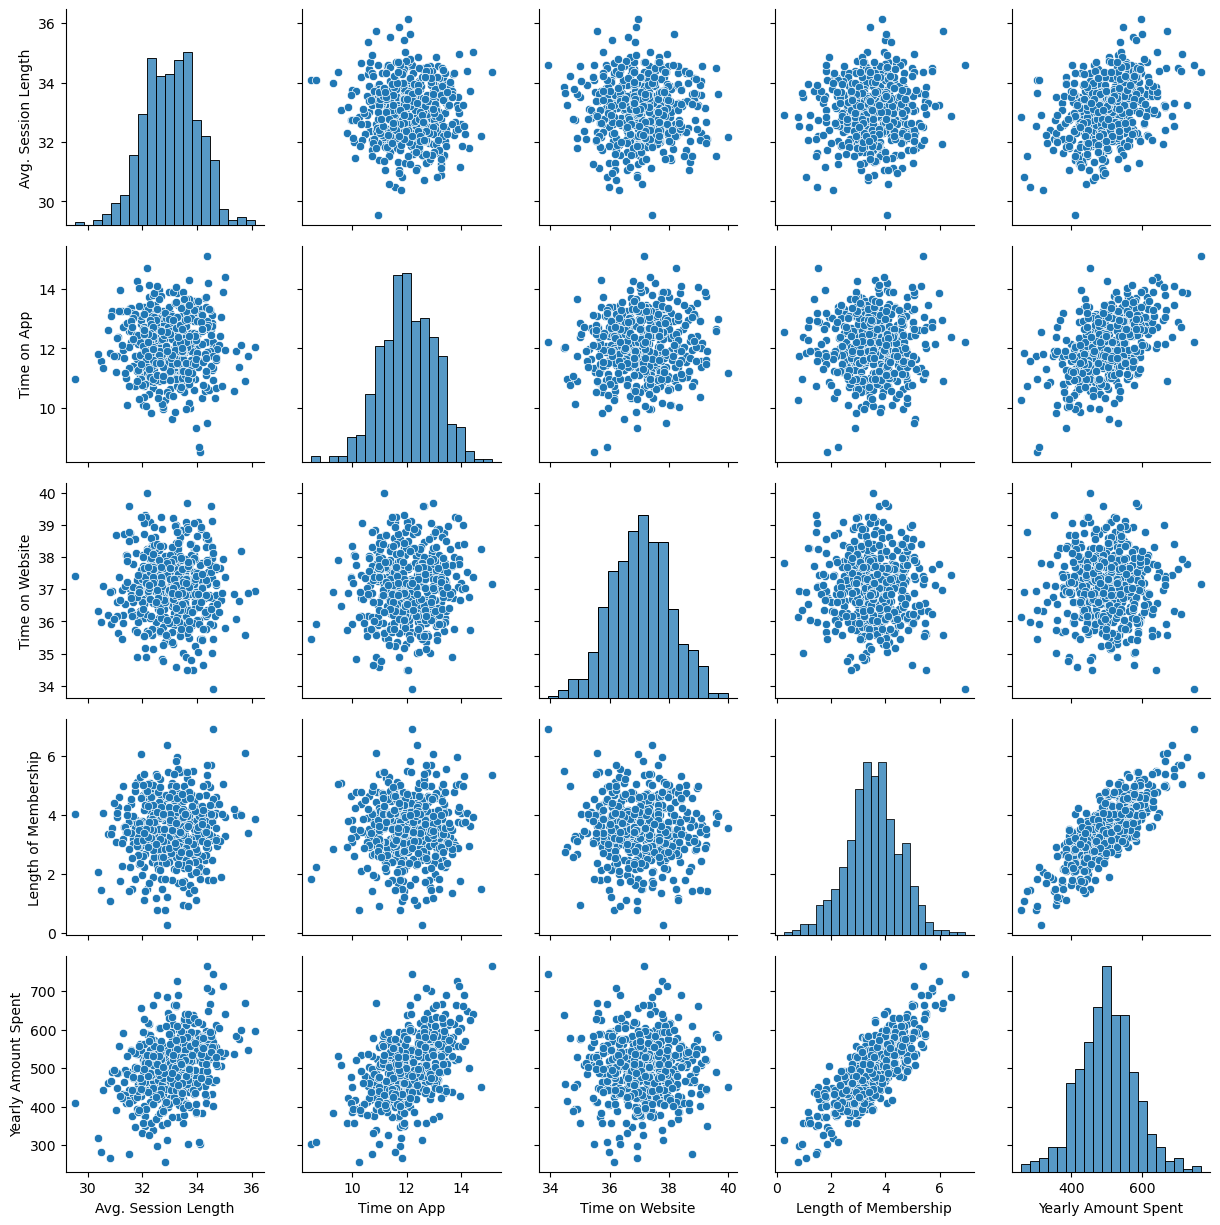

In [24]:
d = sns.PairGrid(ecommerse)
d.map_diag(sns.histplot)
d.map_offdiag(sns.scatterplot)

Here we see that the best correlation are beetween 'Length of Membership' and 'Yearly Amount Spent',they are positively correlated with each other

Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?

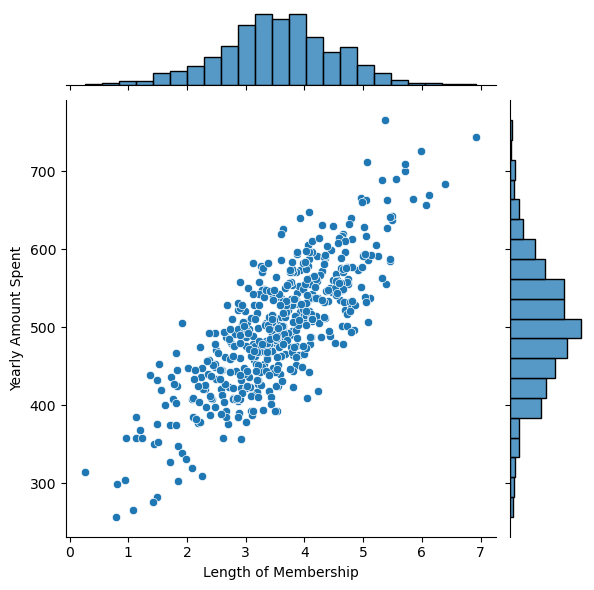

In [25]:
sns.jointplot(data=ecommerse, x="Length of Membership", y="Yearly Amount Spent")

The most correlated feature with Yearly Amount Spent is Length of Membership

Create a linear model plot (using seaborn's lmplot) of Yearly Amount Spent vs. Length of Membership.

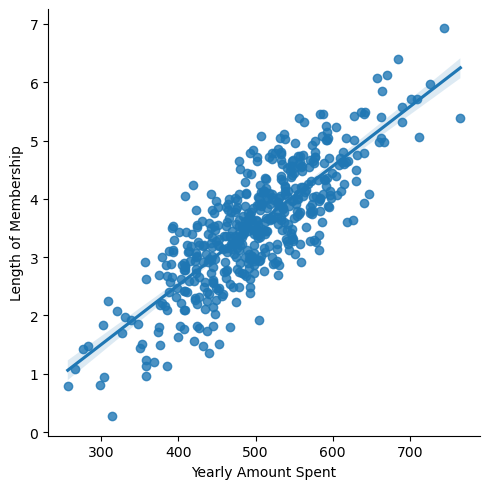

In [27]:
sns.lmplot(x="Yearly Amount Spent", y="Length of Membership",data=ecommerse)

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets. Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column.

In [28]:
from sklearn.model_selection import train_test_split

In [32]:
X = ecommerse.select_dtypes(include=['int64', 'float64'])
Y = ecommerse['Yearly Amount Spent']

In [33]:
X.shape

(500, 5)

In [34]:
Y.shape

(500,)

Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)


In [36]:
X_train.shape, y_train.shape

((400, 5), (400,))

In [37]:
X_test.shape, y_test.shape

((100, 5), (100,))

Now its time to train our model on our training data! Import LinearRegression from sklearn.linear_model. Create an instance of a LinearRegression() model named lm. Train/fit lm on the training data.

In [4]:
from sklearn.linear_model import LinearRegression

In [39]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

Print out the coefficients of the model.

In [41]:
lm.coef_

array([-4.04673321e-15, -3.06824110e-15,  4.46740003e-16, -1.45210244e-14,
        1.00000000e+00])

In [43]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Session Length,-4.046733e-15
Time on App,-3.068241e-15
Time on Website,4.467400e-16
Length of Membership,-1.452102e-14
Yearly Amount Spent,1.000000e+00


Now that we have fit our model, let's evaluate its performance by predicting off the test values! Use lm.predict() to predict off the X_test set of the data.

In [44]:
predictions = lm.predict(X_test)

In [45]:
print(predictions)

[452.31567548 401.03313522 410.06961106 599.40609205 586.15587018
 535.48077519 588.71260551 712.39632681 462.89763615 532.72480546
 327.37795259 492.5568337  543.34016626 403.7669021  765.51846194
 537.84619527 708.93518487 501.92826487 564.79096901 571.21600483
 408.64035107 548.51852928 467.4278485  490.6004425  571.47103412
 410.60294395 534.77148495 368.65478495 540.26340041 443.44186006
 605.0610388  640.18774001 493.18021625 568.71757593 501.10024523
 560.44379217 447.68790654 432.48116856 436.58074035 461.92087689
 587.57479948 445.74984124 632.12358814 505.11334354 506.13234244
 518.06455798 577.73602485 541.97220376 356.61556789 472.99224667
 467.80092437 552.94034545 256.67058229 487.54750487 521.24078024
 304.13559158 507.39006179 387.35707274 478.88539132 426.15454771
 537.2150527  590.56271965 744.2218671  544.40927216 533.04006018
 439.99787994 434.02169975 502.4097853  642.10157873 476.19141335
 548.2803202  373.8857237  551.62014548 399.9838716  484.51980911
 503.97837

Create a scatterplot of the real test values versus the predicted values.

In [46]:
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
mean_squared_error(y_test, predictions)

1.2924697071141058e-27

In [47]:
r2_score(y_test, predictions)

1.0

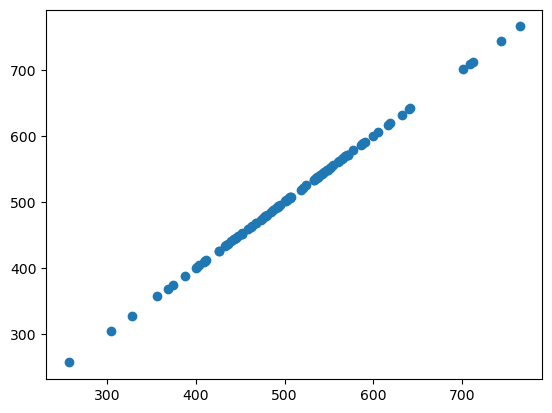

In [49]:
plt.scatter(y_test,predictions)

Now we see that our model is really very good and gave us mostly correct results

<Axes: xlabel='Yearly Amount Spent', ylabel='Count'>

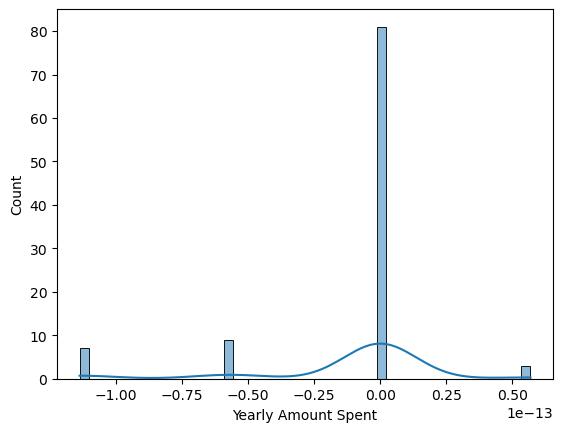

In [50]:
sns.histplot((y_test-predictions),kde= True, bins=50)

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas

In [51]:
from sklearn import metrics

In [52]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('r squared: ',r2_score(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.4779288903810084e-14
MSE: 1.2924697071141058e-27
r squared:  1.0
RMSE: 3.595093471822542e-14


You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().

<Axes: xlabel='Yearly Amount Spent', ylabel='Count'>

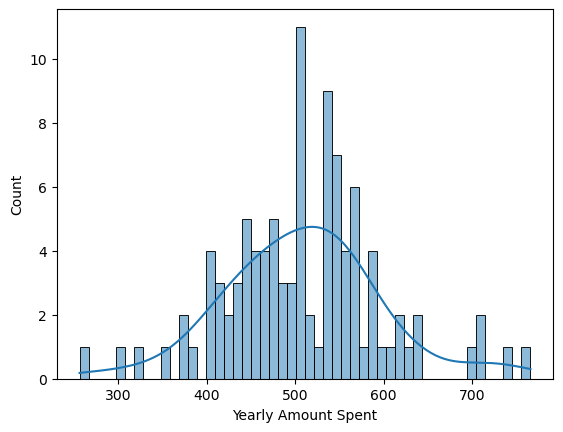

In [58]:
sns.histplot((y_test),kde= True, bins=50)

<Axes: ylabel='Count'>

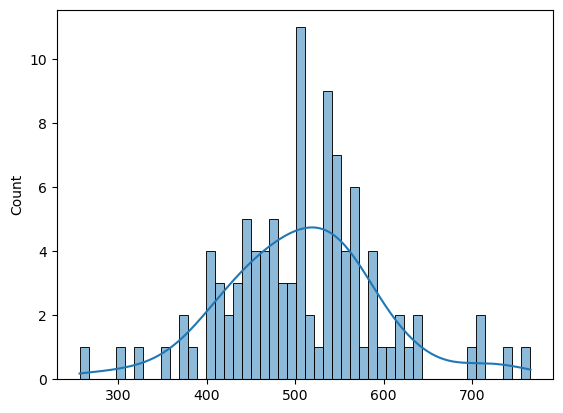

In [59]:
sns.histplot((predictions),kde= True, bins=50)

We still want to figure out the answer to the original question, do we focus our efforts on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important. Let's see if we can interpret the coefficients at all to get an idea. Do you think the company should focus more on their mobile app or on their website?

We mostly focused on Website Development because time spent on website is higher than in app but apps are also important and companies must be focused both on websites and apps